# HOME SWEET HOME

_Prepared by **Abdurahman Alrobaie** as part of Coursera Data Science Capstone project_

## TABLE OF CONTENTS

* [1.INTRODUCTION](#chapter1)
* [2.DATA UNDERSTANDING](#chapter2)
    * [2.1 Retrieving Neighborhoods' Data](#section_2_1)
    * [2.2 Retrieving Foursquare API Data](#section_2_2)
* [3.EXPLORATORY DATA ANALYSIS (EDA)](#chapter3)
    * [3.1 Commercial Density](#section_3_1)
    * [3.2 Outdoor Places Density](#section_3_2)
    * [3.3 Industrial Density](#section_3_3)
* [4.METHODOLOGY](#chapter4)
* [5.CLUSTERING THE NEIGHBORHOODS](#chapter5)
    * [5.1 Preparing the Data](#section_5_1)
    * [5.2 Choosing the Number of Clusters](#section_5_2)
* [6.RESULTS AND DISCUSSION](#chapter6)
* [7.CONCLUSION](#chapter7)

# 1.INTRODUCTION <a class="anchor" id="chapter1"></a>

According to a statistical study by General Authority for Statistics in Saudi Arabia, about 38% of the population do not own a permanent residence (Aawsat, 2019). The decision of owning a home is a critical action to many families in Saudi Arabia in terms of effort, time, and most importantly money. One point that stands as a crucial element in this process is the location of your house. Such a decision is crucial to determine many of your future life activities including the quality of living in a specific place within the city and proximity to various services. This project addresses this issue by performing an analysis of Khobar City, SA, and clustering the promising neighborhoods according to the following factors: 

1.	Proximity to city center
2.	Services and venues within the neighborhood
3.	Distance from factories and industrial areas

Consequently, a Machine Learning (ML) clustering model is fitted to cluster the neighborhoods based on the venues nearby them. The clustering of neighborhoods can group similar neighborhoods for giving an easy process of finding your future home's location. The ML does not rate the neighborhoods but rather it shows the similarity and dissimilarity between neighborhoods. For example, a neighborhood located within the edges of city with few services would be in a different cluster than a neighborhood close to the center with many services. Additionally, the model would place neighborhoods of dense commercial areas together which can help both customers and workers to choose a convenient location.
 

# 2.DATA UNDESTANDING <a class="anchor" id="chapter2"></a>

In [1]:
import pandas as pd 
import numpy as np 
import folium 
import matplotlib 
import matplotlib.pyplot as plt
import requests

## 2.1 Retrieving Neighborhoods' Data  <a class="anchor" id="section_2_1"></a>

In [2]:
#Importing the json file created by GeoJson for Khobar's neighborhoods
import json

with open ("D:/Downloads/map.geojson") as f:
  data = json.load(f)

# dump = json.dumps(data)
khobar_geo = data

In [3]:
#Functions for converting coordinates and calculating the Euclidean distance 
from pyproj import Proj
p = Proj(proj='utm',zone=39,ellps='WGS84', preserve_units=False)

#!pip install shapely
import shapely.geometry

# !pip install pyproj
import pyproj
# LONG THEN LAT, X then y
import math

def lonlat_to_xy(lon, lat):
    xy = p(lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    lonlat = p(x, y, inverse=True)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [4]:
from shapely.geometry import Polygon #To create polygons of the neighborhoods
center_UTM = [50.205957, 26.272917 ]  
center_XY = [0,0]
center_XY[0], center_XY[1] = lonlat_to_xy(center_UTM[0], center_UTM[1])

neighborhood = []
Latitude = []
Longitude = []
Dist = []
X = []
Y = []
k = 0

#Finding the centroid coordinate of each neighborhood and the distance from the city center
for i in range(len(khobar_geo['features'])): 
#     print(khobar_geo['features'][k]['properties']['name'])
    neighborhood.append(str(khobar_geo['features'][k]['properties']['name']))
    
    lng = []
    lat = []
    shape = []
    for i in khobar_geo['features'][k]['geometry']['coordinates'][0]:
        lng.append(i[0])
        lat.append(i[1])
        shape.append([i[0], i[1]])
    polygon = Polygon(shape)
    Latitude.append(polygon.centroid.coords[0][1]) #The polygon centroid y-coordinate 
    Longitude.append(polygon.centroid.coords[0][0]) #The polygon centroid x-coordinate
    X.append(lonlat_to_xy(polygon.centroid.coords[0][0], polygon.centroid.coords[0][1])[0])
    Y.append(lonlat_to_xy(polygon.centroid.coords[0][0], polygon.centroid.coords[0][1])[1])
    Dist.append(calc_xy_distance(center_XY[0], center_XY[1], X[k], Y[k]))
    
    k = k + 1
    


In [5]:
#Deleting unecessary data from the Geojson file
k = 0
for feature in khobar_geo['features']:

    coordinates = feature['geometry']['coordinates'][0]
    
    for i in range(0,len(coordinates)):
        coordinates[i].pop(2)
        
    khobar_geo['features'][k]['geometry']['coordinates'][0]
    k = k +1 

**The result code cell below shows the Geojson file information and the functions's results** 

In [6]:
dict = {'Neighborhood':neighborhood,
        'Latitude':Latitude,
        'Longitude':Longitude, 'X':X,
        'Y':Y,
        'Distance':Dist}
df = pd.DataFrame.from_dict(dict)
df.head(10)

Neighborhood   Latitude  Longitude              X             Y  \
0             THUQBAH  26.274439  50.191364  419260.957823  2.906329e+06   
1       SOUTH THUQBAH  26.273737  50.205405  420662.446460  2.906243e+06   
2               ISKAN  26.257636  50.208391  420949.699536  2.904457e+06   
3               HAMRA  26.226879  50.204523  420542.507086  2.901053e+06   
4              TAAWIN  26.224262  50.186858  418776.065391  2.900774e+06   
5             KHUZAMA  26.208595  50.186968  418776.199502  2.899039e+06   
6  DUGHEITHER VILLAGE  26.274842  50.213668  421488.268917  2.906360e+06   
7               SAHIL  26.255873  50.217583  421866.439607  2.904257e+06   
8        NORTH KHOBAR  26.290838  50.213636  421495.859179  2.908132e+06   
9        MADINAT UMAL  26.293403  50.203582  420493.793127  2.908422e+06   

      Distance  
0  1466.819086  
1   106.211710  
2  1709.884239  
3  5100.947741  
4  5716.547726  
5  7372.194020  
6   798.957141  
7  2216.201050  
8  2127.867270  
9  2281.309626

In [7]:
#Plotting a choropleth map to visualize the results
khobar_map = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)

dist_tresh = np.linspace(0,df['Distance'].max(),6, dtype=int)
dist_tresh = dist_tresh.tolist()
dist_tresh[-1] = dist_tresh[-1] + 1

#Choropleth maps
khobar_map.choropleth(
    geo_data= khobar_geo,
    data=df,
    columns=['Neighborhood','Distance'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale = dist_tresh,
    legend_name='Distance from City Center in meter',
    reset = True
)

#Plotting neighborhoods's centroids
khobar_map.add_child(folium.features.CircleMarker([center_UTM[1], center_UTM[0]], 
                                                      radius=4,
                                                      color='red',
                                                      popup = 'Khobar City Center',
                                                      fill=True,
                                                      fill_color= 'red',
                                                      fill_opacity=1))

for i, lat, long in zip(df['Neighborhood'], df['Latitude'], df['Longitude']):
    khobar_map.add_child(folium.features.CircleMarker([lat, long], 
                                                      radius=2,
                                                      color='green',
                                                      popup = i,
                                                      fill=True,
                                                      fill_color= 'blue',
                                                      fill_opacity=1))
    
folium.LayerControl().add_to(khobar_map)  
khobar_map

**Foursquare API relies on search queries with specified end points. To obtain venues within the neighborhoods, the search query radius for each neighborhood is specified to 2,000m. The code cell bellow shows a visualization map of these radii.**

In [8]:
for i, lat, long in zip(df['Neighborhood'], df['Latitude'], df['Longitude']):
    khobar_map.add_child(folium.features.Circle([lat, long], 
                                                      radius=2000,
                                                      color='green',
                                                      popup = i,
                                                      fill=True,
                                                      fill_color= 'blue',
                                                      fill_opacity=0.1))
khobar_map

## 2.2 Retrieving Foursquare API Data <a class="anchor" id="section_2_2"></a>

In [9]:
CLIENT_ID = 'A4IHP1KD1INI5CWHPZJXVSQWAFVDFD0H1E3YKAVQCHDB1A24' # your Foursquare ID
CLIENT_SECRET = 'WFR0INS4OGYTGPX5FNYRR1WURSIMPJL3JZ3HPZRPMOGSE5D4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A4IHP1KD1INI5CWHPZJXVSQWAFVDFD0H1E3YKAVQCHDB1A24
CLIENT_SECRET:WFR0INS4OGYTGPX5FNYRR1WURSIMPJL3JZ3HPZRPMOGSE5D4


Based on the project objective, the data retrieved from Foursquare API must contain venues that are important or relatively important in the decision of the location. The selected venue categories along with the category ID as per Foursquare API website are shown bellow.

|Category|ID|Category|ID
|:-|:-|:-|:-|
|Supermarket|52f2ab2ebcbc57f1066b8b46|Elementary School|4f4533804b9074f6e4fb0105|
|Middle School|4f4533814b9074f6e4fb0106|High School|4bf58dd8d48988d13d941735|
|University|4bf58dd8d48988d1ae941735|Food|4d4b7105d754a06374d81259|
|Parks|4bf58dd8d48988d163941735|Mosque|4bf58dd8d48988d138941735|
|Gym & Fitness Center|4bf58dd8d48988d175941735|Art & Entertainment|4d4b7104d754a06370d81259|
|Beach|4bf58dd8d48988d1e2941735|Factory|4eb1bea83b7b6f98df247e06|
|Government Building|4bf58dd8d48988d126941735|Library|4bf58dd8d48988d12f941735|
|Medical Center|4bf58dd8d48988d104941735|Auto Workshop|56aa371be4b08b9a8d5734d3|
|Clothing Store|4bf58dd8d48988d103951735|Grocery Store|4bf58dd8d48988d118951735|
|Shopping Mall|4bf58dd8d48988d1fd941735|Shopping Plaza|5744ccdfe4b0c0459246b4dc|

In [10]:
Categories_ids= ['52f2ab2ebcbc57f1066b8b46','4f4533804b9074f6e4fb0105','4f4533814b9074f6e4fb0106','4bf58dd8d48988d13d941735',
    '4bf58dd8d48988d1ae941735','4d4b7105d754a06374d81259','4bf58dd8d48988d163941735','4bf58dd8d48988d138941735',
    '4bf58dd8d48988d175941735','4d4b7104d754a06370d81259','4bf58dd8d48988d1e2941735','4eb1bea83b7b6f98df247e06',
    '4bf58dd8d48988d126941735','4bf58dd8d48988d12f941735','4bf58dd8d48988d104941735','56aa371be4b08b9a8d5734d3',
    '4bf58dd8d48988d103951735','4bf58dd8d48988d118951735','4bf58dd8d48988d1fd941735','5744ccdfe4b0c0459246b4dc']

Categories_names= ['Supermarket','Elementary School','Middle School','High School','University','Food',
    'Parks','Mosque','Gym & Fitness Center','Art & Entertainment','Beach','Factory','Government Building',
    'Library','Medical Center','Auto Workshop','Clothing Store','Grocery Store','Shopping Mall','Shopping Plaza']

In [11]:
#Function to retrieve the nearby venues
def Get_Ven(Latitudes, Longitudes, Category_ID, Categories, Radius, Limit):
    Venues_ids = []
    Venues_lats = []
    Venues_lons = []
    Venues_Sub_Categories = []
    Venues_Categories = []
    Veues_names = []
    bla = 0
    
    for lat, lon in zip(Latitudes, Longitudes):
        for Category, ID in zip(Categories,Category_ID):
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                lat,
                lon,
                VERSION,
                ID,
                Radius, 
                Limit)
    
            results = requests.get(url).json()['response']['venues']
    
            for i in results:
                if i['id'] in Venues_ids:
                    None
                else: 
                    Venues_ids.append(i['id'])
                    Venues_lats.append(i['location']['lat'])
                    Venues_lons.append(i['location']['lng'])
                    Venues_Categories.append(Category)
                    Venues_Sub_Categories.append(i['categories'][0]['name'])
                    Veues_names.append(i['name'])   
                
    return Venues_ids, Venues_lats, Venues_lons, Venues_Categories, Venues_Sub_Categories, Veues_names

In [12]:
Latitudes = df['Latitude'].tolist()
Longitudes = df['Longitude'].tolist()

In [13]:
# Venues_ids, Venues_lats, Venues_lons, Venues_Categories, Venues_Sub_Categories, Veues_names = Get_Ven(Latitudes,
#                                                                                                       Longitudes, 
#                                                                                                       Categories_ids,
#                                                                                                       Categories_names,
#                                                                                                       1500,
#                                                                                                       500)

In [14]:
# dictionory = {'ID': Venues_ids,
#               'Name':Veues_names,
#               'Latitudes':Venues_lats,
#               'Longitudes':Venues_lons,
#               'Category':Venues_Categories,
#               'Sub Category':Venues_Sub_Categories}

In [15]:
# df_venues =  pd.DataFrame.from_dict(dictionory)

In [16]:
# df_venues.to_csv('Khobar1.csv')

**Since Foursquare API charge for calls above the free use threshold, the result of the above search queries are saved into local files.** 

In [17]:
df_venues = pd.read_csv(r'C:\Users\baron\1 Python\Khobar1.csv', usecols=range(1,7))

In [18]:
df_venues

ID                              Name  Latitudes  \
0     577e08ba498ee027e6fb1727                    تموينات القرني  26.273430   
1     4f413350e4b0740e7b8c7f02  Farm Supermarket (أسواق المزرعة)  26.289101   
2     5cc7ff1c65211f002c271991            اسواق الثلاجة العالمية  26.285603   
3     571623c8498e0d3bcf4d6465                        Meed (ميد)  26.264993   
4     57706fb0cd100106d4872c5c                        بقالة ماجد  26.264034   
...                        ...                               ...        ...   
2731  4ef210bc30f8e7873b6a25eb         مكدونالد الدانة MCdunalds  26.267037   
2732  527f7a3411d2004e66f78154    ابو حنيس للمأكولات البر مائية.  26.261268   
2733  536b9b03498e1f325ba4336a                              موحي  26.264544   
2734  5db153f0fe7ae00008189b6d                  بوفية شواطئ الود  26.261724   
2735  52dae6a3498e8778e0e7a965                 كافتيريا السندباد  26.267265   

      Longitudes     Category          Sub Category  
0      50.186268  Supermarket           Supermarket  
1      50.192048  Supermarket           Supermarket  
2      50.193726  Supermarket           Supermarket  
3      50.192548  Supermarket           Supermarket  
4      50.191147  Supermarket         Grocery Store  
...          ...          ...                   ...  
2731   50.194977         Food   American Restaurant  
2732   50.199804         Food   American Restaurant  
2733   50.191902         Food         Burrito Place  
2734   50.190409         Food  Fast Food Restaurant  
2735   50.195027         Food         Burrito Place  

[2736 rows x 6 columns]

**The venues's data frame is combined with the neighborhood data frame since Foursquare API does not provide reliable information about the venue's neighborhood.**  

In [19]:
from shapely.geometry import shape, GeometryCollection, Point

neigh_venues = []
distr = df_venues.loc[:,['Latitudes','Longitudes']]
# distr = distr.head()
latcor = df_venues['Latitudes'].tolist()
loncor = df_venues['Longitudes'].tolist()

neigh_venues.clear()

for lat, lon in zip(latcor,loncor):
    point = Point(lon,lat)
    found = False
    for feature in khobar_geo['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point) and found is False:
            neigh_venues.append(feature['properties']['name'])
            found = True
        else:
            None
    if found is False:
        neigh_venues.append('Outside Khobar')

df_venues['Neighborhood'] = neigh_venues

In [20]:
df_venues

ID                              Name  Latitudes  \
0     577e08ba498ee027e6fb1727                    تموينات القرني  26.273430   
1     4f413350e4b0740e7b8c7f02  Farm Supermarket (أسواق المزرعة)  26.289101   
2     5cc7ff1c65211f002c271991            اسواق الثلاجة العالمية  26.285603   
3     571623c8498e0d3bcf4d6465                        Meed (ميد)  26.264993   
4     57706fb0cd100106d4872c5c                        بقالة ماجد  26.264034   
...                        ...                               ...        ...   
2731  4ef210bc30f8e7873b6a25eb         مكدونالد الدانة MCdunalds  26.267037   
2732  527f7a3411d2004e66f78154    ابو حنيس للمأكولات البر مائية.  26.261268   
2733  536b9b03498e1f325ba4336a                              موحي  26.264544   
2734  5db153f0fe7ae00008189b6d                  بوفية شواطئ الود  26.261724   
2735  52dae6a3498e8778e0e7a965                 كافتيريا السندباد  26.267265   

      Longitudes     Category          Sub Category     Neighborhood  
0      50.186268  Supermarket           Supermarket          THUQBAH  
1      50.192048  Supermarket           Supermarket        AQRABIYAH  
2      50.193726  Supermarket           Supermarket        AQRABIYAH  
3      50.192548  Supermarket           Supermarket          THUQBAH  
4      50.191147  Supermarket         Grocery Store          THUQBAH  
...          ...          ...                   ...              ...  
2731   50.194977         Food   American Restaurant          THUQBAH  
2732   50.199804         Food   American Restaurant  SINAYIAT THUGBA  
2733   50.191902         Food         Burrito Place          THUQBAH  
2734   50.190409         Food  Fast Food Restaurant          THUQBAH  
2735   50.195027         Food         Burrito Place          THUQBAH  

[2736 rows x 7 columns]

# 3.EXPLORATORY DATA ANALYSIS (EDA) <a class="anchor" id="chapter3"></a>

In [21]:
Categories_names

['Supermarket',
 'Elementary School',
 'Middle School',
 'High School',
 'University',
 'Food',
 'Parks',
 'Mosque',
 'Gym & Fitness Center',
 'Art & Entertainment',
 'Beach',
 'Factory',
 'Government Building',
 'Library',
 'Medical Center',
 'Auto Workshop',
 'Clothing Store',
 'Grocery Store',
 'Shopping Mall',
 'Shopping Plaza']

In [22]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2736 non-null   object 
 1   Name          2736 non-null   object 
 2   Latitudes     2736 non-null   float64
 3   Longitudes    2736 non-null   float64
 4   Category      2736 non-null   object 
 5   Sub Category  2736 non-null   object 
 6   Neighborhood  2736 non-null   object 
dtypes: float64(2), object(5)
memory usage: 149.8+ KB


#### The data frame does not contain any null values 

In [23]:
print('The number of neighborhood is: ', df_venues['Neighborhood'].nunique(), 
    '\n The number of categories is: ', df_venues['Category'].nunique(),
    '\n The number of sub categories is: ', df_venues['Sub Category'].nunique())

The number of neighborhood is:  42 
 The number of categories is:  20 
 The number of sub categories is:  211


In [24]:
df_venues.groupby(['Category'])[['ID']].count().rename(columns={'ID': 'Count'}).sort_values('Count',ascending=False)

Count
Category                   
Food                    795
Medical Center          310
Clothing Store          298
Art & Entertainment     256
Gym & Fitness Center    211
Mosque                  194
Government Building      90
Auto Workshop            86
Grocery Store            66
Supermarket              65
Factory                  61
Beach                    59
Shopping Mall            57
Parks                    53
High School              44
Elementary School        25
University               23
Middle School            19
Shopping Plaza           15
Library                   9

The venues within the food category are highest in the venues data frame. Although some values seem reasonable, others do not clearly represent the density of venues in the neighborhoods. For example, the number of medical centers is high since Foursquare API users tend to register departments within a medical center as separate medical centers. However, the effect of this error does not harm the cause of the clustering neighborhoods since this helps distinguishing medical centers based on their number of provided services. The university category holds the same comment about medical centers. 

In [25]:
df_venues.groupby(['Neighborhood'])[['ID']].count().rename(columns={'ID': 'Count'}).sort_values('Count',ascending=False)

Count
Neighborhood                 
Outside Khobar            374
NORTH KHOBAR              252
OLAYA                     196
AQRABIYAH                 153
THUQBAH                   128
SOUTH RAKAH               122
YARMOUK                    95
JISR                       95
SOUTH THUQBAH              94
HIZAM THAHABI              89
HIZAM AKHDAR               83
KHUZAMA                    82
KURNAISH                   72
MADINAT UMAL               71
DUGHEITHER VILLAGE         71
QURTOBAH                   66
BANDARIYAH                 65
ANDALUS                    59
SINAYIAT THUGBA            47
ISKAN                      46
TAAWIN                     45
SAWARI                     44
RAWABI                     40
SAHIL                      40
TAHLIYAH                   38
JAWHARA                    35
SHERAA                     33
IBN SINA                   25
HADA                       25
BUHAIRAH                   24
AZIZIYAH                   23
BAHAR                      20
AMWAJ                      17
BUSTAN                     16
HAMRA                      15
SINAYIAT FAWAZIYA          14
AQIQ                       10
RAJA                        6
KAWTHAR                     3
MAHA                        1
LULU                        1
KHOBAR HOUSING PROJECT      1

Some neighborhoods have a very low number of venues like 1 or even 10. Although the reality is different, but it is accurate that they have far less than the rest of other neighborhoods. Since the objective is only to cluster them, the model will not be affected severely by the lack of the accurate number.

In [26]:
for i, lat, long in zip(df_venues['Neighborhood'], df_venues['Latitudes'], df_venues['Longitudes']):
    khobar_map.add_child(folium.features.CircleMarker([lat, long], 
                                                      radius=2,
                                                      color='green',
                                                      popup = i,
                                                      fill=True,
                                                      fill_color= 'blue',
                                                      fill_opacity=1))
khobar_map

## 3.1 Commercial Density  <a class="anchor" id="section_3_1"></a>

The map below shows the commercially dense areas in Khobar's City. Commercial areas include venues of the following categories:
    1. Shopping Malls 
    2. Clothing Stores
    3. Restaurants
    4. Food
    5. Gym & Fitness Center
    6. Art & Entertainment
    7. Grocery Store
    8. Shopping Plaza

In [27]:
Commercial_categories = ['Supermarket', 'Food', 'Gym & Fitness Center', 'Art & Entertainment','Clothing Store',
                         'Grocery Store','Shopping Mall','Shopping Plaza']

In [28]:
df_com = df_venues.loc[df_venues['Category'].isin(Commercial_categories)]
com_lonlats = []
for lat, lon in zip(df_com['Latitudes'],df_com['Longitudes']):
    com_lonlats.append([lat,lon])

In [29]:
#Functions to change the style of Folium maps
def boroughs_style(feature):
    return { 'color': 'black', 'fill': False }

def stat_style(feature):
    return { 'color': 'black', 'fill': True }

In [30]:
from folium import plugins
from folium.plugins import HeatMap

khobar_map = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)
folium.TileLayer('cartodbpositron').add_to(khobar_map) #cartodbpositron cartodbdark_matter
HeatMap(com_lonlats, min_opacity= 0.1).add_to(khobar_map)

folium.GeoJson(khobar_geo, style_function=boroughs_style).add_to(khobar_map)

khobar_map

The neighborhoods close to the center in the north of Khobar City show a dense concentration of commercial venues.

## 3.2 Outdoor Places Density <a class="anchor" id="section_3_2"></a>

The map below shows the outdoor places density in Khobar's City. Such areas include the following categories:
    1. Parks
    2. Beaches

In [31]:
Outdoor_categories = ['Parks', 'Beach']

df_out = df_venues.loc[df_venues['Category'].isin(Outdoor_categories)]
out_lonlats = []
for lat, lon in zip(df_out['Latitudes'],df_out['Longitudes']):
    out_lonlats.append([lat,lon])

In [32]:
from folium import plugins
from folium.plugins import HeatMap

khobar_map = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)
folium.TileLayer('cartodbpositron').add_to(khobar_map)
HeatMap(out_lonlats, min_opacity= 0.3).add_to(khobar_map)

folium.GeoJson(khobar_geo, style_function=boroughs_style).add_to(khobar_map)

khobar_map

## 3.3 Industrial Areas Density <a class="anchor" id="section_3_3"></a>

The map below shows the industrially dense areas in Khobar's City. industrial areas include the following categories:
    1. Factories
    2. Auto Workshop

In [33]:
Industrial_categories = ['Factory', 'Auto Workshop']

df_inds = df_venues.loc[df_venues['Category'].isin(Industrial_categories)]
inds_lonlats = []
for lat, lon in zip(df_inds['Latitudes'],df_inds['Longitudes']):
    inds_lonlats.append([lat,lon])

In [34]:
from folium import plugins
from folium.plugins import HeatMap

khobar_map = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)
folium.TileLayer('cartodbpositron').add_to(khobar_map)
HeatMap(inds_lonlats, min_opacity= 0.20).add_to(khobar_map)

folium.GeoJson(khobar_geo, style_function=boroughs_style).add_to(khobar_map)

folium.GeoJson(khobar_geo, style_function=boroughs_style).add_to(khobar_map)

khobar_map

Due to Foursquare not having data about industrial places, the heat map above does not precisely specify the industrially concentrated places. However, based on an internet search, the industrial places are more in South Thuqbah and Safaa neighborhoods which is the south slightly dense area in the heat map. Car workshops may not be considered as industrial places but usually, the noise generated from such venues is annoying. Additionally, having both venues on the same category can direct the clustering model to include certain neighborhoods like Safaa together.

#### Density Map 

In [35]:
khobar_map = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)

folium.TileLayer('cartodbpositron').add_to(khobar_map)
HeatMap(com_lonlats, min_opacity= 0.1, name='Commercial Density').add_to(khobar_map)
HeatMap(out_lonlats, min_opacity= 0.3, name='Outdoor Places Density').add_to(khobar_map)
HeatMap(inds_lonlats, min_opacity= 0.2, name='Industrial Density').add_to(khobar_map)

folium.GeoJson(khobar_geo, name='Neighborhood Boundaries', style_function=boroughs_style).add_to(khobar_map)

folium.LayerControl().add_to(khobar_map)
khobar_map


# 4.METHODOLOGY <a class="anchor" id="chapter4"></a>

To cluster the neighborhoods, a data frame of statistical information about the venue categories in each neighborhood must be created. One approach is to list the frequency of venues of a specific category within each neighborhood. For example, the numbers of venues within each category represent the features of the new data frame while the neighborhoods are the rows. However, since some neighborhoods can be small and within reach of neighborhoods of dense venues, the frequency is not sufficient as a clustering criterion. As an example, the Jawharah neighborhood has a low number of venues but it is very close to Andalus, which has many venues, making the Jawharah neighborhood similar to any empty neighborhood on the edge of Khobar City. Therefore, the average distance to a venue of a specific category is considered. The average distance is calculated by counting the total distance to each venue of a specific category within a radius of 1,500 m from the neighborhood center and dividing it by their number. Such a method takes into account the convenience of reach, demonstrated by the average distance, and the density of these venues, demonstrated by the frequency. Also, The distance from the city center is added to demonstrate the closeness of every part of the city. 

In [36]:
#For creating the data frame keys and first key's values 
Diction = {'Neighborhood':[], 'Distance from Center':[]}
keys = ['Neighborhood']
for i in Categories_names:
    Diction['{} Average Distance'.format(i)] = [] 
    Diction['{} Frequency'.format(i)] = []

In [37]:
#Function to obtain the average distance and frequency for a specific location and category
def get_stat(Category, Longitude, Latitude, Radius):
    #Defining parameters of the neighborhood
    center  = lonlat_to_xy(Longitude, Latitude)
    neigh = Point(center[0], center[1]).buffer(Radius)
    freq = 0
    dist_avg = 0 
    
    #Selecting latitudinal and longitudinal coordinates 
    df_select = df_venues.loc[df_venues['Category'] == Category]
    
    #Obtaining average distance and frequency
    for lat, lon in zip(df_select['Latitudes'],df_select['Longitudes']):
        venue =  lonlat_to_xy(lon, lat)
        point_center = Point(venue[0], venue[1])
        if neigh.contains(point_center):
            freq += 1
            new_dist = calc_xy_distance(center[0], center[1], venue[0] , venue[1])
            dist_avg = (new_dist+dist_avg)/2
        else:
            None
        
    return dist_avg, freq
        
    

In [38]:
for Name, Lat, Lon, Distance in zip(df['Neighborhood'], df['Latitude'], df['Longitude'], df['Distance']): 
    Diction['Neighborhood'].append(Name)
    Diction['Distance from Center'].append(Distance)
    
    for Category in Categories_names:
        dist_avg, freq = get_stat(Category, Lon, Lat, 1500)
        Diction['{} Average Distance'.format(Category)].append(dist_avg) 
        Diction['{} Frequency'.format(Category)].append(freq) 
        
df_stat = pd.DataFrame.from_dict(Diction)

In [39]:
df_stat

Neighborhood  Distance from Center  \
0                  THUQBAH           1466.819086   
1            SOUTH THUQBAH            106.211710   
2                    ISKAN           1709.884239   
3                    HAMRA           5100.947741   
4                   TAAWIN           5716.547726   
5                  KHUZAMA           7372.194020   
6       DUGHEITHER VILLAGE            798.957141   
7                    SAHIL           2216.201050   
8             NORTH KHOBAR           2127.867270   
9             MADINAT UMAL           2281.309626   
10               AQRABIYAH           2926.142816   
11                   OLAYA           3900.760462   
12                    HADA           4683.326229   
13            HIZAM AKHDAR           3907.359596   
14              BANDARIYAH           3993.892337   
15                 YARMOUK           4524.535883   
16                  BUSTAN           5371.697446   
17           HIZAM THAHABI           4941.291149   
18                 ANDALUS           5977.472548   
19                 JAWHARA           6307.257599   
20                  RAWABI           6562.698142   
21                KURNAISH           6306.033946   
22                   BAHAR           9262.098061   
23             SOUTH RAKAH           8693.777436   
24  KHOBAR HOUSING PROJECT           9064.195999   
25                  SAWARI          11043.478408   
26                  SHERAA          13361.004436   
27                    MAHA          12013.522496   
28                BUHAIRAH           8886.715351   
29                 KAWTHAR          16368.238137   
30                    RAJA          14203.989925   
31                   AMWAJ          15665.620227   
32                    LULU          18112.015940   
33                    AQIQ          20502.125130   
34                TAHLIYAH           9998.851811   
35                AZIZIYAH           8691.311083   
36                    JISR           6953.522539   
37                QURTOBAH           7897.318841   
38       SINAYIAT FAWAZIYA           3148.238854   
39                IBN SINA           3446.602151   
40         SINAYIAT THUGBA           2087.450514   

    Supermarket Average Distance  Supermarket Frequency  \
0                    1029.408236                      4   
1                    1184.318876                      7   
2                     983.416303                      3   
3                       0.000000                      0   
4                     629.110848                      1   
5                    1110.316188                      5   
6                     623.373109                      7   
7                     999.981005                      2   
8                    1090.853670                     11   
9                     905.666583                     11   
10                   1196.124896                     13   
11                    891.326634                     11   
12                   1294.790910                     11   
13                   1038.639868                      9   
14                   1337.926831                      6   
15                    715.377808                      2   
16                    661.844407                      5   
17                    721.789293                      5   
18                    965.243428                      3   
19                   1005.320665                      3   
20                    807.841703                      4   
21                    838.924512                      3   
22                      0.000000                      0   
23                   1310.119863                      6   
24                      0.000000                      0   
25                    549.257303                      1   
26                    453.207034                      1   
27                      0.000000                      0   
28                      0.000000                      0   
29                      0.000000                      0   


# 5.CLUSTERING THE NEIGHBORHOODS <a class="anchor" id="chapter5"></a>

## 5.1 Preparing the Data <a class="anchor" id="section_5_1"></a>

Additionally, a data frame is created by showing the 10 most common venues within each neighborhood. This data frame helps in understanding the result of the clustering and what categories can represent the nature of venues within that neighborhood. However, the clustering model is fitted only by preprocessing the data in df_stat.

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [41]:
cols = [c for c in df_stat.columns if c[-8:] != 'Distance']
df_frequency = df_stat[cols]
no_freq= ['Neighborhood', 'Distance from Center']

for i in df_frequency.columns[2:]:
    no_freq.append(i[:-10])
    
df_frequency.columns = no_freq
df_frequency.drop(columns=['Distance from Center'], inplace=True)

D:\Programs\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
df_frequency

Neighborhood  Supermarket  Elementary School  Middle School  \
0                  THUQBAH            4                  5              1   
1            SOUTH THUQBAH            7                  2              2   
2                    ISKAN            3                  3              1   
3                    HAMRA            0                  1              1   
4                   TAAWIN            1                  0              0   
5                  KHUZAMA            5                  1              3   
6       DUGHEITHER VILLAGE            7                  1              2   
7                    SAHIL            2                  2              1   
8             NORTH KHOBAR           11                  5              5   
9             MADINAT UMAL           11                  7              8   
10               AQRABIYAH           13                  8              8   
11                   OLAYA           11                  3              3   
12                    HADA           11                  4              1   
13            HIZAM AKHDAR            9                  5              5   
14              BANDARIYAH            6                  3              5   
15                 YARMOUK            2                  1              0   
16                  BUSTAN            5                  0              0   
17           HIZAM THAHABI            5                  0              0   
18                 ANDALUS            3                  1              0   
19                 JAWHARA            3                  0              0   
20                  RAWABI            4                  0              0   
21                KURNAISH            3                  0              0   
22                   BAHAR            0                  0              0   
23             SOUTH RAKAH            6                  1              2   
24  KHOBAR HOUSING PROJECT            0                  0              0   
25                  SAWARI            1                  0              0   
26                  SHERAA            1                  0              0   
27                    MAHA            0                  0              0   
28                BUHAIRAH            0                  0              0   
29                 KAWTHAR            0                  0              0   
30                    RAJA            0                  0              0   
31                   AMWAJ            1                  1              0   
32                    LULU            0                  0              0   
33                    AQIQ            0                  0              0   
34                TAHLIYAH            3                  1              0   
35                AZIZIYAH            3                  1              1   
36                    JISR            4                  1              2   
37                QURTOBAH            4                  0              1   
38       SINAYIAT FAWAZIYA            0                  2              1   
39                IBN SINA            0                  1              1   
40         SINAYIAT THUGBA            3                  4              1   

    High School  University  Food  Parks  Mosque  Gym & Fitness Center  ...  \
0             2           1    48      1      15                    13  ...   
1             4           1    73      6      24                    30  ...   
2             4           1    76      2       8                     1  ...   
3             0           0    43      0       3                     2  ...   
4             0           0    46      0       2                     1  ...   
5             1           0    70      1       6                     7  ...   
6             1           1    78      6      20                    27  ...   
7             3           0    50      2       4                     0  ...   
8             5           1    73      7      31                    

In [43]:
#Function to retrieve the most common venues within a single row
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
#Creating the most common venues data frame 
df_common = pd.DataFrame(columns=columns)
df_common['Neighborhood'] = df_frequency['Neighborhood']

for ind in np.arange(df_common.shape[0]):
    df_common.iloc[ind, 1:] = return_most_common_venues(df_frequency.iloc[ind, :], num_top_venues)

df_common

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                  THUQBAH                  Food        Medical Center   
1            SOUTH THUQBAH                  Food        Medical Center   
2                    ISKAN                  Food         Auto Workshop   
3                    HAMRA                  Food         Grocery Store   
4                   TAAWIN                  Food               Factory   
5                  KHUZAMA                  Food   Art & Entertainment   
6       DUGHEITHER VILLAGE                  Food        Medical Center   
7                    SAHIL                  Food         Auto Workshop   
8             NORTH KHOBAR        Clothing Store                  Food   
9             MADINAT UMAL        Medical Center        Clothing Store   
10               AQRABIYAH        Medical Center        Clothing Store   
11                   OLAYA        Clothing Store                  Food   
12                    HADA                  Food        Medical Center   
13            HIZAM AKHDAR        Medical Center                  Food   
14              BANDARIYAH                  Food        Medical Center   
15                 YARMOUK                  Food        Clothing Store   
16                  BUSTAN                  Food        Medical Center   
17           HIZAM THAHABI                  Food        Medical Center   
18                 ANDALUS                  Food  Gym & Fitness Center   
19                 JAWHARA  Gym & Fitness Center                  Food   
20                  RAWABI                  Food  Gym & Fitness Center   
21                KURNAISH                  Food        Medical Center   
22                   BAHAR                  Food        Medical Center   
23             SOUTH RAKAH                  Food                Mosque   
24  KHOBAR HOUSING PROJECT        Medical Center        Shopping Plaza   
25                  SAWARI                  Food            University   
26                  SHERAA                  Food   Art & Entertainment   
27                    MAHA            University        Shopping Plaza   
28                BUHAIRAH                  Food   Art & Entertainment   
29                 KAWTHAR                  Food            University   
30                    RAJA                  Food   Art & Entertainment   
31                   AMWAJ                  Food           Supermarket   
32                    LULU                  Food        Shopping Plaza   
33                    AQIQ                 Beach                  Food   
34                TAHLIYAH                  Food        Medical Center   
35                AZIZIYAH                  Food                Mosque   
36                    JISR                  Food                Mosque   
37                QURTOBAH                  Food   Art & Entertainment   
38       SINAYIAT FAWAZIYA                  Food         Auto Workshop   
39                IBN SINA         Auto Workshop                  Food   
40         SINAYIAT THUGBA                  Food         Auto Workshop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Clothing Store                Mosque  Gym & Fitness Center   
1         Clothing Store  Gym & Fitness Center   Art & Entertainment   
2                Factory        Medical Center                Mosque   
3                 Mosque         Auto Workshop        Medical Center   
4          Auto Workshop                Mosque   Art & Entertainment   
5   Gym & Fitness Center                Mosque        Medical Center   
6         Clothing Store   Art & Entertainment  Gym & Fitness Center   
7                Factory                Mosque   Art & Entertainment   
8         Medical Center   Art & Entertainment   Government Building   
9                   Food   Art & Entertainment                Mosque   
10                  Food   Art & Entertainment  Gym & Fitness Center   
11        Medical Center   Art & Entertai

In [45]:
#Standardizing the data
from sklearn import preprocessing #To standardize the data before fitting the model

df_clustering = df_stat.drop('Neighborhood', 1)

df_stat_processed = df_clustering

df_stat_processed = preprocessing.StandardScaler().fit(df_stat_processed).transform(df_stat_processed)


## 5.2 Choosing the Number of Clusters <a class="anchor" id="section_5_2"></a>

The chosen clustering model is K-means which is a method of vector quantization that based on an initial number of clusters, the observations are clustered. The data are clustered since there are a lot of features and observations which makes grouping such observations without using machine learning difficult and possibly inaccurate. Clustering is an unsupervised ML technique which provides no classes to test the accuracy of the model. However, the number of desired clusters is set to several values and each result is analyzed to choose the best number of clusters. The factors affecting the number of clusters include the average Silhouette Coefficient and the agreement of previous EDA. The Silhouette Coefficient is a value for each sample that is calculated by the following formula:


\begin{equation}
s = \frac{b-a}{max(a,b)}
\end{equation}

Such that:

$s$ : Silhouette Coefficient    
$b$: The average distance between the observation and other observations within the same cluster \
$a$: The average distance between the observation and other observations of other clusters

In [46]:
from sklearn.cluster import KMeans #The clustering ML model
from sklearn.metrics import silhouette_samples, silhouette_score #Evaluation metrics

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [47]:
#Function to color neighborhoods on map based on the cluster's color
def get_color(feature):
#     print(feature['properties']['name'])
    name = feature['properties']['name']
    for i, color in enumerate(colors):
        if i == int(df_trial['Labels'].loc[df_trial['Neighborhood']==name]):
            return color
        else:
            None

In [48]:
#defining a list of colors
colors = ['red', 'yellow', 'blue', 'green', 'pink', 'black', 'brown', 'orange', 'purple']

In [49]:
#To display two Folium maps on the same plot
from IPython.core.display import display, HTML

colored_khobar = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(khobar_map.get_root().render().replace('"', '&quot;'),500,500,
                   colored_khobar.get_root().render().replace('"', '&quot;'),500,500))

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


For n_clusters = 2 The average silhouette_score is : 0.29658398980889095


D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


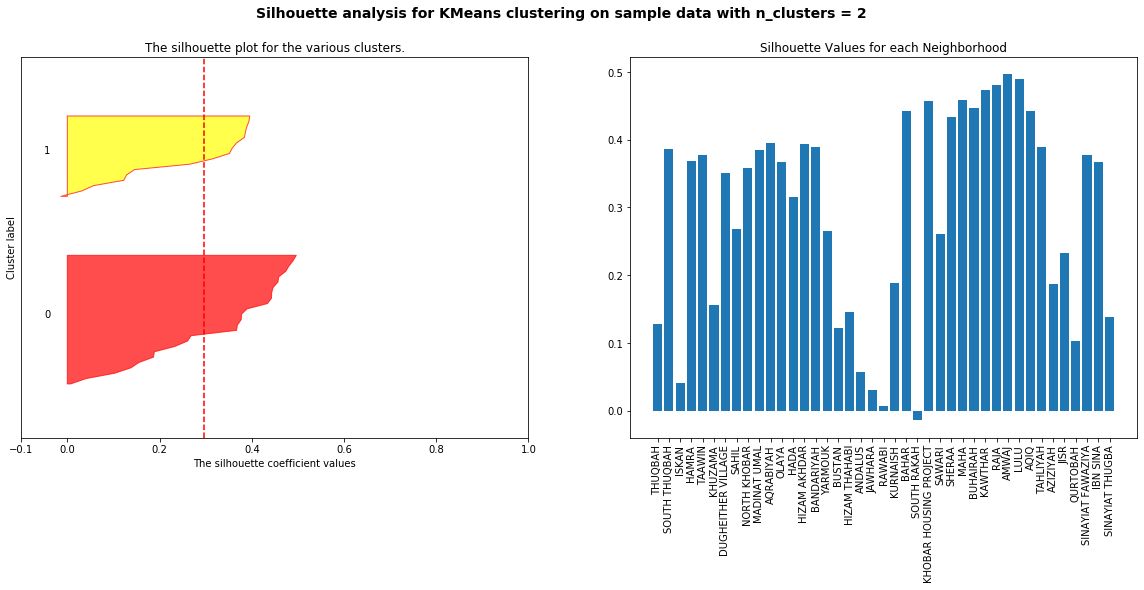

For n_clusters = 3 The average silhouette_score is : 0.25307617703970553


D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


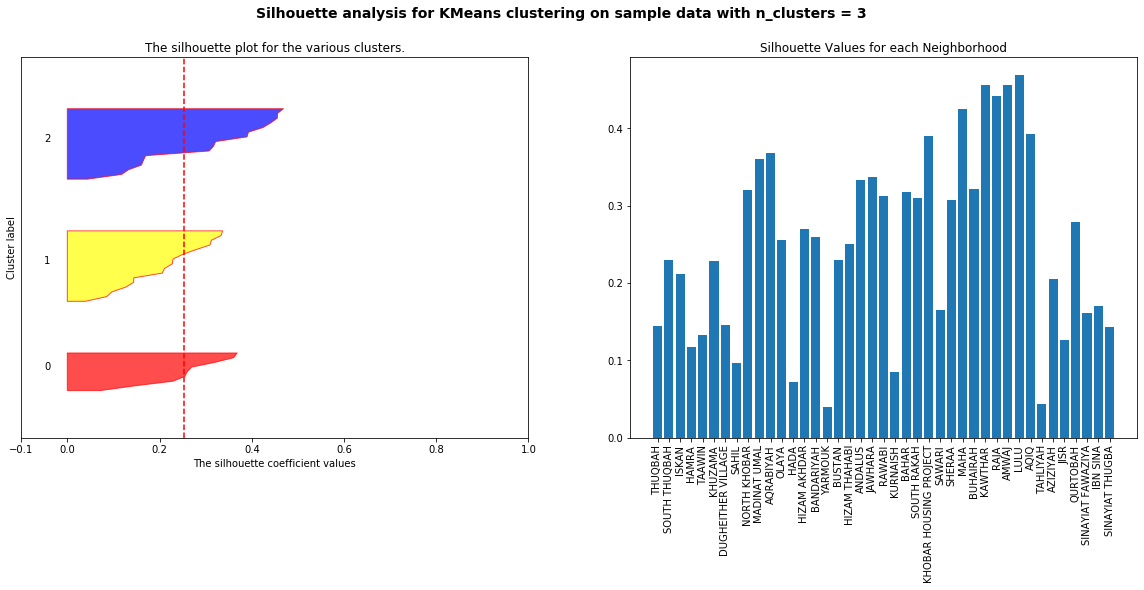

For n_clusters = 4 The average silhouette_score is : 0.23057135528319414


D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


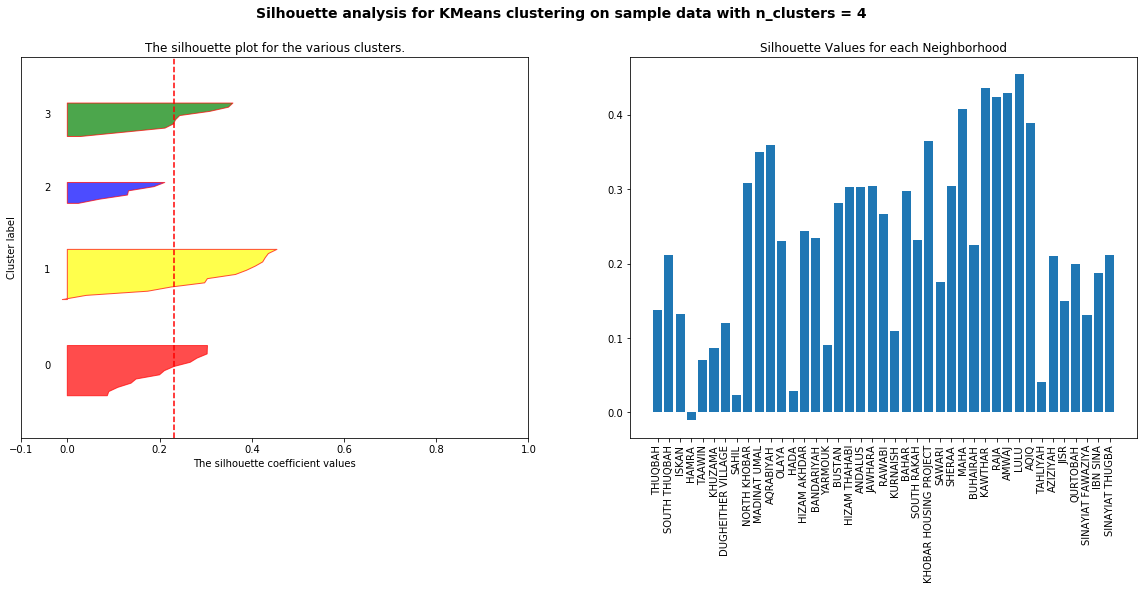

For n_clusters = 5 The average silhouette_score is : 0.17970201042577616


D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


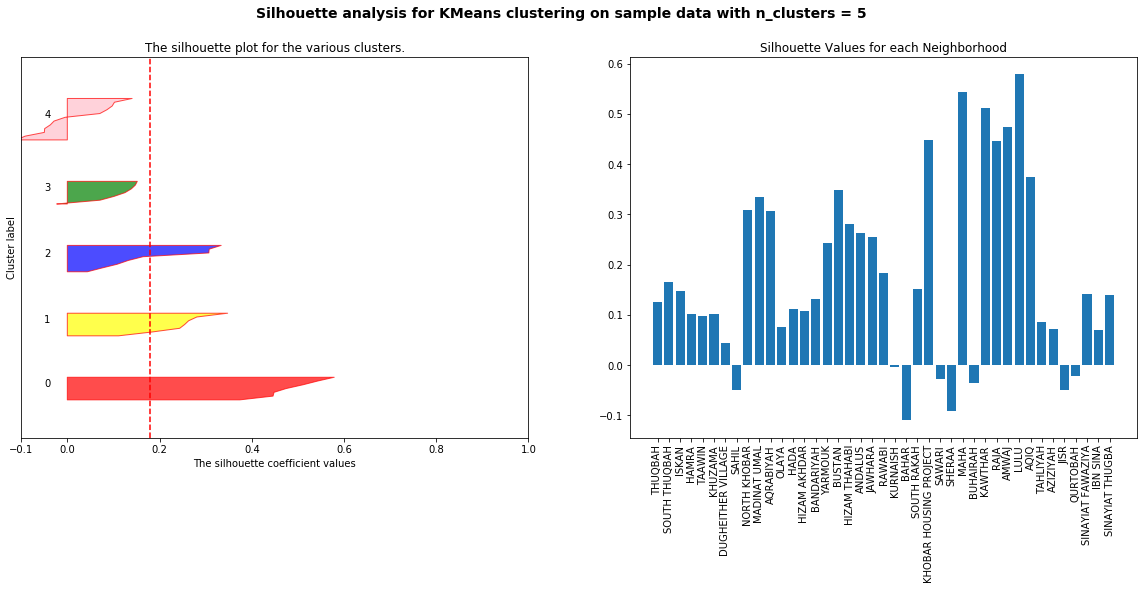

In [50]:
range_n_clusters = [ 2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(df_stat_processed) 
    df_trial = df
    df['Labels'] = cluster_labels

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_stat_processed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_stat_processed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i


        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=colors[i], edgecolor=colors, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the Sillhouette coefficient for each neighborhood
    ax2.bar(df['Neighborhood'],sample_silhouette_values) 
    ax2.set_xticklabels(df['Neighborhood'], rotation=90 )


    #Plotting a colored map to visualize the results
    colored_khobar = folium.Map(location=[center_UTM[1], center_UTM[0]], zoom_start=11)

    folium.TileLayer('cartodbpositron').add_to(colored_khobar)

    folium.GeoJson(khobar_geo,
                   style_function=lambda feature: {
                       'fillColor': get_color(feature),
                       'color' : 'black',
                       'weight' : 2,
                       'dashArray' : '5, 5'}).add_to(colored_khobar)
    
    folium.GeoJson(khobar_geo, style_function=stat_style).add_to(colored_khobar)

    #Plotting both the heat map and the colored map
    htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
                   '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
                   .format(khobar_map.get_root().render().replace('"', '&quot;'),500,500,
                           colored_khobar.get_root().render().replace('"', '&quot;'),500,500))



    ax2.set_title("Silhouette Values for each Neighborhood")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

    display(htmlmap)

plt.show()

### Two Clusters
The average Silhouette coefficient is 0.29658 which among the others is the highest. The Silhouette Coefficient of neighborhoods shows some deviation from the average coefficient value of each cluster indicating a dissimilarity between like-cluster observations. Additionally, it seems to be clustering only based on commercial density which does distinguish neighborhoods clearly based on other features.


### Three Clusters
The average Silhouette coefficient is 0.25307 which is relatively less than the previous number of clusters option. The three clusters option provides extra information and fits the heat map of commercial density better than the two clusters option. However, it clusters the southern neighborhoods with neighborhoods of higher industrial density.


### Four Clusters
The average Silhouette coefficient is 0.230571 which is less than the previous two options. Although the coefficient is less, the clustering visual map fits both the industrial and commercial heat maps. The clustering distinguishes between commercially dense, moderate, and light neighborhoods as shown in green, red, and yellow colors, respectively. Moreover, the blue-colored neighborhood shares a similar higher level of industrial activities. The Silhouette coefficient value for each neighborhood plot shows a variation with few neighborhoods having low values and only one below zero. This option balances between the agreement with previous EDA and having a relative reduction in the average Silhouette coefficient.


### Five Clusters
The average Silhouette coefficient is 0.17970 which is far less than the highest result. Furthermore, many neighborhoods have negative coefficient values unlike the previous options. The clustering colored map shows a disagreement with the EDA industrial density heat map. Clearly, from and after five clusters, the model would result in lower average Silhouette coefficient values or a furthermore mismatch with the heat maps. 

# 6.RESULTS AND DISCUSSION <a class="anchor" id="chapter6"></a>

Based on the previous analysis, Khobar City's neighborhoods are clustered into 4 clusters. This option shows the best description of each cluster and matches with the heat map density analysis in the EDA. The following lists the clusters and the neighborhoods within each one:

In [51]:
clusterer = KMeans(n_clusters=4, random_state=0)
cluster_labels = clusterer.fit_predict(df_stat_processed)
df['Labels'] = cluster_labels

In [52]:
df_common['Class'] = cluster_labels

### First Cluster

In [53]:
df_common.loc[df_common['Class']==0]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         THUQBAH                  Food        Medical Center   
5         KHUZAMA                  Food   Art & Entertainment   
15        YARMOUK                  Food        Clothing Store   
16         BUSTAN                  Food        Medical Center   
17  HIZAM THAHABI                  Food        Medical Center   
18        ANDALUS                  Food  Gym & Fitness Center   
19        JAWHARA  Gym & Fitness Center                  Food   
20         RAWABI                  Food  Gym & Fitness Center   
21       KURNAISH                  Food        Medical Center   
23    SOUTH RAKAH                  Food                Mosque   
35       AZIZIYAH                  Food                Mosque   
36           JISR                  Food                Mosque   
37       QURTOBAH                  Food   Art & Entertainment   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Clothing Store                Mosque  Gym & Fitness Center   
5   Gym & Fitness Center                Mosque        Medical Center   
15        Medical Center   Art & Entertainment  Gym & Fitness Center   
16  Gym & Fitness Center        Clothing Store                Mosque   
17  Gym & Fitness Center   Art & Entertainment        Clothing Store   
18   Art & Entertainment                Mosque        Medical Center   
19   Art & Entertainment        Medical Center                Mosque   
20        Clothing Store        Medical Center   Art & Entertainment   
21   Art & Entertainment        Clothing Store  Gym & Fitness Center   
23        Medical Center         Auto Workshop   Art & Entertainment   
35        Medical Center   Art & Entertainment  Gym & Fitness Center   
36        Medical Center  Gym & Fitness Center   Art & Entertainment   
37  Gym & Fitness Center        Medical Center                Mosque   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Art & Entertainment         Grocery Store         Auto Workshop   
5                Factory   Government Building           Supermarket   
15                Mosque                 Parks         Shopping Mall   
16   Art & Entertainment                 Parks         Shopping Mall   
17                Mosque                 Parks         Shopping Mall   
18        Clothing Store   Government Building           High School   
19        Clothing Store                 Parks               Factory   
20                Mosque   Government Building               Factory   
21                Mosque                 Beach                 Parks   
23  Gym & Fitness Center   Government Building           Supermarket   
35        Clothing Store   Government Building           High School   
36   Government Building         Grocery Store        Clothing Store   
37         Auto Workshop           High School   Government Building   

   9th Most Common Venue 10th Most Common Venue  Class  
0      Elementary School    Government Building      0  
5         Clothing Store          Auto Workshop      0  
15   Government Building          Grocery Store      0  
16   Government Building            Supermarket      0  
17   Government Building            High School      0  
18                 Parks            Supermarket      0  
19   Government Building            High School      0  
20           Supermarket          Grocery Store      0  
21   Government Building            Supermarket      0  
23         Grocery Store            High School      0  
35           Supermarket          Grocery Store      0  
36           Supermarket            High School      0  
37           Supermarket                Factory      0

The first cluster encompasses 13 neighborhoods that share a moderate commercial density and relatively close to the city's center. The neighborhoods do not share a similar common category of venues. Instead, they share the absence of industrial and large commercial venues.

### Second Cluster

In [54]:
df_common.loc[df_common['Class']==1]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3                    HAMRA                  Food         Grocery Store   
22                   BAHAR                  Food        Medical Center   
24  KHOBAR HOUSING PROJECT        Medical Center        Shopping Plaza   
25                  SAWARI                  Food            University   
26                  SHERAA                  Food   Art & Entertainment   
27                    MAHA            University        Shopping Plaza   
28                BUHAIRAH                  Food   Art & Entertainment   
29                 KAWTHAR                  Food            University   
30                    RAJA                  Food   Art & Entertainment   
31                   AMWAJ                  Food           Supermarket   
32                    LULU                  Food        Shopping Plaza   
33                    AQIQ                 Beach                  Food   
34                TAHLIYAH                  Food        Medical Center   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                 Mosque         Auto Workshop        Medical Center   
22   Art & Entertainment                 Beach         Grocery Store   
24  Gym & Fitness Center     Elementary School         Middle School   
25  Gym & Fitness Center   Art & Entertainment                 Beach   
26                Mosque  Gym & Fitness Center                 Beach   
27         Shopping Mall     Elementary School         Middle School   
28                Mosque         Auto Workshop        Medical Center   
29        Shopping Plaza         Shopping Mall     Elementary School   
30        Medical Center            University  Gym & Fitness Center   
31     Elementary School                 Beach  Gym & Fitness Center   
32         Shopping Mall     Elementary School         Middle School   
33        Shopping Plaza  Gym & Fitness Center     Elementary School   
34                Mosque           Supermarket         Grocery Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3   Gym & Fitness Center        Clothing Store     Elementary School   
22  Gym & Fitness Center                Mosque     Elementary School   
24           High School            University                  Food   
25                Mosque           Supermarket   Government Building   
26   Government Building                 Parks           Supermarket   
27           High School                  Food                 Parks   
28                 Beach     Elementary School         Middle School   
29         Middle School           High School                 Parks   
30     Elementary School         Middle School           High School   
31         Middle School           High School            University   
32           High School            University                 Parks   
33         Middle School           High School            University   
34   Government Building  Gym & Fitness Center     Elementary School   

   9th Most Common Venue 10th Most Common Venue  Class  
3          Middle School                Factory      1  
22         Middle School            High School      1  
24                 Parks                 Mosque      1  
25               Factory                Library      1  
26        Medical Center                Factory      1  
27                Mosque   Gym & Fitness Center      1  
28           High School             University      1  
29                Mosque   Gym & Fitness Center      1  
30                 Parks                 Mosque      1  
31                 Parks                 Mosque      1  
32                Mosque   Gym & Fitness Center      1  
33                 Parks                 Mosque      1  
34           High School    Art & Entertainment      1

This cluster includes 13 neighborhoods with relatively low density of any type of venues and remote location from the city's center. There are some similarities with neighborhoods from the first cluster, but they are not similar since the table shows only frequency. Although having similar most common venues, they still are low in density to other neighborhoods in the first cluster. 

### Third Cluster

In [55]:
df_common.loc[df_common['Class']==2]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2               ISKAN                  Food         Auto Workshop   
4              TAAWIN                  Food               Factory   
7               SAHIL                  Food         Auto Workshop   
38  SINAYIAT FAWAZIYA                  Food         Auto Workshop   
39           IBN SINA         Auto Workshop                  Food   
40    SINAYIAT THUGBA                  Food         Auto Workshop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2                Factory        Medical Center                Mosque   
4          Auto Workshop                Mosque   Art & Entertainment   
7                Factory                Mosque   Art & Entertainment   
38               Factory   Art & Entertainment     Elementary School   
39               Factory   Art & Entertainment                Mosque   
40               Factory                Mosque        Medical Center   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2    Art & Entertainment           High School     Elementary School   
4   Gym & Fitness Center           Supermarket        Clothing Store   
7         Clothing Store        Medical Center           High School   
38        Medical Center                 Beach                Mosque   
39     Elementary School         Middle School  Gym & Fitness Center   
40     Elementary School           Supermarket         Grocery Store   

   9th Most Common Venue 10th Most Common Venue  Class  
2            Supermarket         Clothing Store      2  
4          Grocery Store    Government Building      2  
7      Elementary School                  Parks      2  
38         Middle School            High School      2  
39        Shopping Plaza         Medical Center      2  
40           High School                  Beach      2

The third cluster contains 6 neighborhoods with dense industrial spaces. The first, second, and third most common venues have either auto workshops or factories as the most common venues. The table shows a presence of other categories as well like schools and medical centers but this is due to the search radius being extended relatively outside all neighborhoods.

### Fourth Cluster

In [56]:
df_common.loc[df_common['Class']==3]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1        SOUTH THUQBAH                  Food        Medical Center   
6   DUGHEITHER VILLAGE                  Food        Medical Center   
8         NORTH KHOBAR        Clothing Store                  Food   
9         MADINAT UMAL        Medical Center        Clothing Store   
10           AQRABIYAH        Medical Center        Clothing Store   
11               OLAYA        Clothing Store                  Food   
12                HADA                  Food        Medical Center   
13        HIZAM AKHDAR        Medical Center                  Food   
14          BANDARIYAH                  Food        Medical Center   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1         Clothing Store  Gym & Fitness Center   Art & Entertainment   
6         Clothing Store   Art & Entertainment  Gym & Fitness Center   
8         Medical Center   Art & Entertainment   Government Building   
9                   Food   Art & Entertainment                Mosque   
10                  Food   Art & Entertainment  Gym & Fitness Center   
11        Medical Center   Art & Entertainment  Gym & Fitness Center   
12        Clothing Store  Gym & Fitness Center   Art & Entertainment   
13        Clothing Store  Gym & Fitness Center   Art & Entertainment   
14        Clothing Store   Art & Entertainment  Gym & Fitness Center   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1                 Mosque   Government Building         Shopping Mall   
6                 Mosque   Government Building         Shopping Mall   
8                 Mosque  Gym & Fitness Center         Shopping Mall   
9   Gym & Fitness Center         Grocery Store   Government Building   
10                Mosque         Grocery Store         Shopping Mall   
11         Shopping Mall                Mosque           Supermarket   
12                Mosque           Supermarket         Shopping Mall   
13                Mosque         Grocery Store                 Parks   
14                Mosque                 Parks         Shopping Mall   

   9th Most Common Venue 10th Most Common Venue  Class  
1          Grocery Store            Supermarket      3  
6            Supermarket          Grocery Store      3  
8          Grocery Store            Supermarket      3  
9            Supermarket          Shopping Mall      3  
10           Supermarket    Government Building      3  
11   Government Building                  Parks      3  
12   Government Building                  Parks      3  
13           High School            Supermarket      3  
14         Grocery Store    Government Building      3

The fourth cluster has 9 neighborhoods with the highest commercial density among other neighborhoods. The data frame above demonstrates this fact by having commercial categories being in the first 5 most common venues. Additionally, shopping malls are included within the 10 most common venues in almost all of them

### Remark

Usually, perfect residential areas are located within a neighborhood that is neither high nor low in commercial density. This gives the convenience of reaching them easily while not being annoyed by the large traffic and presence near them. Moreover, they are relatively close to the city center which makes commuting to different parts of the city not difficult. The industrial presence is also a crucial factor that could greatly affect the quality of living. These factors based on the previous clustering result are clearly noticed in the first cluster which makes a group of the most promising neighborhoods for your future house.

# 7.CONCLUSION <a class="anchor" id="chapter7"></a>

In conclusion, the most likely suitable neighborhood for a future house is one of the first cluster neighborhoods. Although there are numerous factors for selecting that location, whether personal or financial, the first to consider are included in the first cluster. Consequently, a more in-depth analysis takes place where you can select from different parts of the neighborhood. It is worth mentioning that the analysis does not take into account the availability of residential building permits within all places. Therefore, the analysis was focused more on neighborhoods rather than residential areas. Overall, this can be a good kick-off for the first step into the pursuit of having your dream house. 